In [2]:
%matplotlib notebook
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt



## Learning Objectives

At the end of this lesson, you will be equipped to:

- Recognize the relationship between time and money 
- Explain discounting, interest, and growth of money
- Calculate present and future values of money, annuities, and bonds
- Apply these calculations to appropriate situations


## Notation

In mathematically describing the time value of money, we'll use the following notation.

$$P=\mbox{present value } (\$)$$
$$F=\mbox{future value } (\$)$$
$$N=\mbox{number of periods of investment } (\mbox{period})$$
$$i=\mbox{interest rate per period } (\mbox{period}^{-1}) $$

# Time Value of Money

The **time value of money** means that a person places a higher value on a dollar in one point in time than on the same dollar at a different (usually later) point in time.

- Are you willing to give me $\$100$ today if I give you $\$100$ in one year? 
- Why or why not? 
- **Risk:** Can you trust that you will get the $\$100$ back?
- **Availability of Capital:** What if you don’t have the $\$100$ to give me?



## Growth With Simple Interest

In the simplest case, the future value of money grows linearly with the number of periods invested.

$$F=P(1+iN)$$

Let's create a python function that calculates this. It will accept 3 variables as inputs, $P$, $i$, and $N$. It will return a single value, $F_{simple}$, the future value in the case of simple interest.

In [3]:
def F_simple(P, i, N):
    '''Growth with simple interest'''
    return P*(1+i*N)

In [4]:
# example
P=100  # You give me $100
i=0.04 # at 10 percent interest per period
N=10   # it takes me 10 periods to pay it back

In [5]:
print("You give me $"+str(P)+" today, but after " + str(N) +
      " years at an interest rate of " + str(i) + ", I will owe you:")
print(F_simple(P, i, N))

You give me $100 today, but after 10 years at an interest rate of 0.04, I will owe you:
140.0


### Question: What kind of function is the simple growth equation?

Recall the equation for F(P, i, N) above. With this simple interest growth type, the future value (the amount owed, in this case) is what kind of function of time (N)?

- linear
- quadratic
- logrithmic
- exponential

<IPython.core.display.Javascript object>


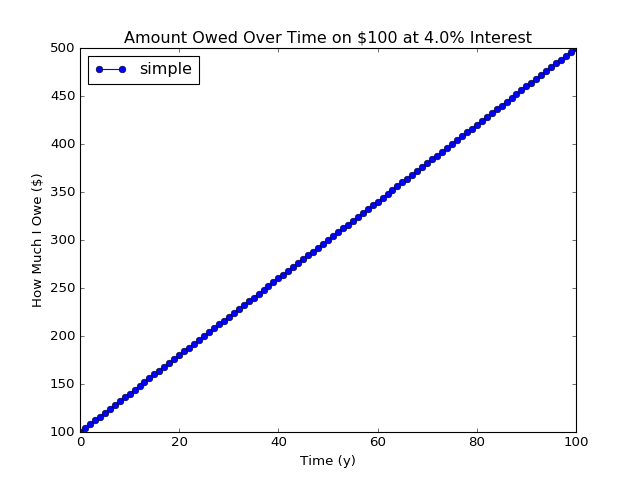

In [6]:
# The magic below shows the plot interactively when it's created
%matplotlib notebook 
# we need the numerical python library
import numpy as np
# we'll use matplotlib to plot the function
import matplotlib 
# we'll call the useful parts of matplotlib "plt"
import matplotlib.pyplot as plt
# time is an array of values between 0 and 100 years in increments of 1 year
time = np.arange(0, 101, 1)
# label the x axis
plt.xlabel('Time (y)') 
# label the y axis
plt.ylabel('How Much I Owe ($)') 
# title the plot
title = "Amount Owed Over Time on $" + str(P) + " at " + str(i*100) + "% Interest"
plt.title(title)
# attach a data series to the plot. Use blue dots with lines.
plt.plot(time, F_simple(P,i,time), 'bo-', label="simple") 
# create a legend and put it in the top left
plt.legend(loc=2) 
# Display the plot (not actually necessary with %matplotlib notebook, but needed in scripts)
plt.show()

### Question: What if the interest rate were doubled?

After 10 years at 10% interest, I would pay you \$200 to make us square. Within this amount, I am paying \$100 to return the original prinicipal. The other \$100 is pure interest.

If the interest rate were doubled (20%), how much _interest_ would I pay you in 10 years?

<IPython.core.display.Javascript object>


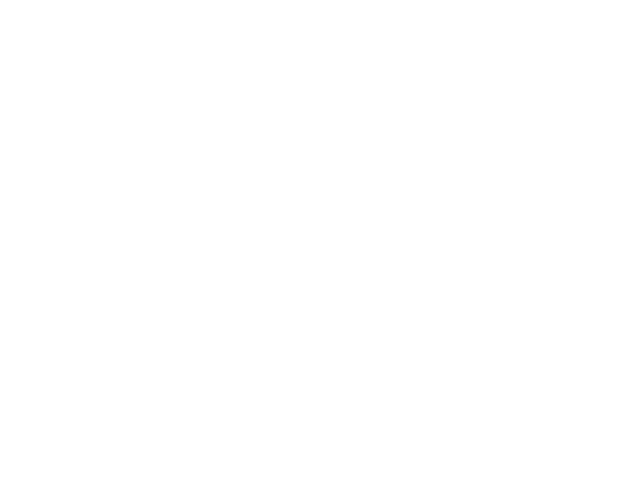

In [7]:
%matplotlib notebook
time = np.arange(0, 11, 1) # plot time between 0 and 10 years in increments of 1 year
rates = np.arange(0.0, 0.11, 0.01) # plot interest rates between 0 and 10% in increments of 1%
plt.xlabel('Interest Rate')
plt.ylabel('How Much I Owe ($)')
title = 'Amount Owed (P=$' + str(P) + ')' 
plt.title(title)
for rate in rates:
    plt.plot(time, F_simple(P,rate,time), label=rate)
plt.legend(loc=2)
plt.show()

## Growth With Compounding Interest

In a compounding interest scenario, the future value of money is _compounded_ at each period. That is, after each period (e.g. each year) the total amount owed is note and then interest is applied to that amount. After the first period, the borrower is racking up additional interest on the interest that they owe. The equation is like this:

$$F=P(1+i)^N$$


### Question: What kind of equation is the compounding interest equation?
For the compounding interest form of F(P, i, N) in the equation above, what kind of relationship does the future value of money (F) have with time (N):

- quadratic
- linear
- logarithmic
- exponential


In [8]:
def F_compound(P, i, N):
    '''Growth with compounding interest'''
    return P*pow((1+i),N)

In [9]:
i = 0.1
print("You give me $"+str(P)+" today, but after " + str(N) +
      " years at an interest rate of " + str(i) + ", I will owe you:")
print(F_compound(P, i, N))

You give me $100 today, but after 10 years at an interest rate of 0.1, I will owe you:
259.3742460100002


In [10]:
# Plot it as a function of interest rate
plt.clf()
time = np.arange(0, 11, 1) 
plt.xlabel('Time')
plt.ylabel('How Much I Owe ($)')
plt.title('Amount Owed As a Function of Time')
plt.plot(time, F_simple(P,i,time), 'bo-', label="simple")
plt.plot(time, F_compound(P,i,time), 'go-', label="compound")
plt.legend(loc=2)
plt.show()

In [11]:
# Plot it for different interest rates
plt.clf()
time = np.arange(0, 11, 1) 
rates = np.arange(0.0, 0.11, 0.01) 
plt.xlabel('Time (y)')
plt.ylabel('How Much I Owe ($)')
plt.title('Amount Owed As a Function of Time')
for rate in rates:
    plt.plot(time, F_compound(P,rate,time), label=rate)
plt.legend(loc=2)
plt.show()

## Discounting

Our examples have shown the growth in an investment due to interest earned. 
Compounding is a way to move money from the present to the future. 
What about going the other way in time, that is, **what is the value of the 
promise of some future amount worth today?** The answer is provided by the 
_inverse_ of compounding, **discounting**.

$$F=\mbox{Future value}$$
$$P=\mbox{Present value}$$
$$N=\mbox{Number of periods}$$
$$i=\mbox{Investment rate per period}$$

Recall that F, as a function of P, is :

$$F = P(1+i)^N$$

Solving this for P, as a function of F, we get:

$$P = \frac{F}{(1+i)^N}$$


In [12]:
def P_compound(F, i, N):
    """The present value, as a function of future value, for compounding interest"""
    return F/pow((1+i),N)

In [13]:
# example
F=100  # I promise you $100
i=0.10 # at 10 percent investment per period
N=10   # but you have to wait 10 periods before I give it to you

print("If you invest " + 
      str(P_compound(F, i, N)) + " today at an investment rate of " + str(i*100) +
      "%, it will be worth $" + str(F) +
      " in " + str(N) + " years.")


If you invest 38.55432894295314 today at an investment rate of 10.0%, it will be worth $100 in 10 years.


In [14]:
# Exercise... Show that P_compound is truly the inverse of F_compound
i = 0.1
N = 10
test_values = [10, 100, 1000]

for f_test in test_values:
    P = P_compound(f_test,i,N)
    obs = F_compound(P, i, N)
    assert(obs == f_test)
    print(obs," = ",f_test)

10.0  =  10
100.0  =  100
1000.0  =  1000


# Inflation

Inflation is the tendency for prices to continuously rise. Conversely, it is the continuous fall in the value of currency (like the dollar).

**Example:** What has happened to the value of the dollar since you entered college (4 yrs)? To answer this, we need inflation rates for 2013‐2016:

 - 2013: 1.5%
 - 2014: 1.6%
 - 2015: 0.1% 
 - 2016: 1.0%
 
$$F = \mbox{buying power today}$$
$$P = \mbox{one dollar in your first year of college}$$
$$i_n = \mbox{inflation rate in year n.}$$
$$F_{n} = P_n(1 +i_{n})$$
$$F_{n} = P_{n+1}$$

$$F_{2016} = P_{2016}(1 + i_{2016})$$
$$F_{2015} = P_{2015}(1 + i_{2015})$$
$$F_{2014} = P_{2014}(1 + i_{2014})$$
$$F_{2013} = P_{2013}(1 + i_{2013})$$

Combined:

$$F_{2016} = P_{2013}(1 + i_{2013})(1 + i_{2014})(1 + i_{2015})(1 + i_{2016})$$


In [15]:
def F_infl(P, infl):
    """The future value of money, due to one year of inflation at rate infl"""
    return P*(1+infl)

import collections
year_infl = collections.OrderedDict()
#year_infl[2011] = 0.03
#year_infl[2012] = 0.017
year_infl[2013] = 0.015
year_infl[2014] = 0.016
year_infl[2015] = 0.001
year_infl[2016] = 0.01

P = {2013:1}
F = {}
for year, infl in year_infl.items():
    P[year+1] = F_infl(P[year], infl)
    F[year] = P[year+1]
    
print(F[2016])
    

1.0425939523999999


### Inflation adjusted interest rate

To adjust your interest rate for the existence of inflation, 

$$i^* = \frac{(1+i)}{(1+r)} - 1$$
$$i^* = \mbox{interest rate adjusted for inflation}$$
$$r = \mbox{rate of inflation}$$
$$i = \mbox{nominal interest rate}$$


## MARR – minimum acceptable rate of return

- You know F and N and are asking for a value of P. But what is the value of i? As an investor you must specify the rate of return that you require.
- We call the interest rate in the computation the minimal acceptable rate of return, MARR

MARR depends on many things; how much capital is available, how much is needed, etc.
- For an individual, it should be at least what could be earned elsewhere.
- For someone with debt, it should be at least the interest charged by the lender.

Let’s say you are a student with a credit card debt charging 1.5% per month on the outstanding balance. That is roughly 18% per year. Your friend Feynman wants to borrow some money. Feynman will give you $100 in one year. How much should you be willing to loan him?

In [16]:
F=100
N=1
i = 0.18
P = P_compound(F, i, N)
print(P)

84.74576271186442


If your MARR is greater than 18%, the amount you should be willing to give should be less than P. If your MARR is less Than 18%, you could give more.

### Exercise: Formulate an equation for $i_{MARR}$
To get $i_{MARR}$ as a function of P and F, you must solve $F_{compound}$ for i.


In the following markdown cell, replace the question marks with the appropriate equation:


$$i_{MARR} = \left(\frac{F}{P}\right)^\frac{1}{n}-1$$

### Excercise: Write the $i_{MARR}$ equation as a python function

In the following python cell, fill in the function:

In [17]:
def i_MARR(F, P, N):
    """The $i_{MARR}$ as a function of future value, present value, 
    and period, for compounding interest
    """
    return pow(F/P, 1/N) - 1 


In [18]:
F = 100
P = 80
N = 12
print(i_MARR(F,P,N))

0.018769265121506118


## What about borrowing money?

Sometimes, the rate at which we make payments is different than the period over which the rate is quoted and compounded. For a car loan, for example, the compounding period is annual, but you make monthly payments for some $m$ months.

$$F = \frac{m}{12}\left(\frac{Pi}{1-(1+i/12)^{-m}}\right)$$


In [19]:
def F_monthly(P, i, m):
    F = (m/12)*(P*i)/(1 - pow(1+i/12,-m))
    print("Total: ",F)
    print("Monthly payment: ", F/m)
    print("Interest paid: ", F-P)
    return F

    

### Example : Car Loan

- Let’s use an example of a $20,000 loan so you can buy a car.
- The current interest rate is 4% on a 60 month loan.

In [20]:
# How much do you pay per month?
# Over the course of the 60 months, how much interest have you paid?

m=60
i=0.04
P=20000.0
    
F = F_monthly(P, i, m)



Total:  22099.826466319162
Monthly payment:  368.3304411053194
Interest paid:  2099.826466319162


### Example : Home Loan

Now lets look longer term. It's time to buy a house. The average price of a home sold in the US in June 2014 was $331,000$. Let's say you get a 15 year fixed rate mortgage at 3.25%. 

In [21]:
N=15
m=15*12
i=0.0325
P=331000.

F = F_monthly(P, i, m)

Total:  418650.05252246873
Monthly payment:  2325.833625124826
Interest paid:  87650.05252246873


In [22]:
N=15
m=15*12
i=0.030
P=370000.

F = F_monthly(P, i, m)

Total:  459927.37242514914
Monthly payment:  2555.152069028606
Interest paid:  89927.37242514914


In [23]:
# what about at 6.5 percent?
i=0.065

F = F_monthly(P, i, m)


Total:  580157.5052880454
Monthly payment:  3223.097251600252
Interest paid:  210157.5052880454


In [24]:
# Same house, $331,000, 30 yr fixed rate 4.25%
N=30
m=N*12
i=0.0325

F = F_monthly(P, i, m)

Total:  579694.8170044136
Monthly payment:  1610.2633805678156
Interest paid:  209694.81700441358


In [25]:
# How about at 6.5% interest? 
i=0.065

F = F_monthly(P, i, m)

Total:  841914.6072926298
Monthly payment:  2338.6516869239717
Interest paid:  471914.6072926298


### Exercise: Paying down the principal

Okay, so, those big banks don't need all your money. It would be great to take their nice low interest rate and pay off the principal as quickly as possible so you aren't paying interest on top of quite so much interest. In buying houses, sometimes a bank won't even charge a fee for paying off your loan faster than intended. Can you derive a formula for how much this kind of behavior will save you? In the case of the mortgate above, let's assume you pay an extra \$50 a month, every month. How much faster could you pay off your loan? How much money do you save?

In [26]:
# do your calculations here


Total:  922408.5588617278
Monthly payment:  2249.7769728334824
Interest paid:  552408.5588617278


## Annuities

Annuities: a series of equal dollar payments coming at the end of a certain time period for a specified number of time periods (n). Examples include mortgages, life insurance benefits, lottery payments, retirement payments.

### Compound annuities

Compound Annuities: depositing an equal sum of money at the end of each time period for a certain number of periods and allowing the money to grow. An example might be having $\$50$ taken out of each paycheck and put in a Christmas account earning a $9\%$ Annual Percentage Rate.

### Future value of an annuity (FVA) equation

This equation is used to determine the future value of a stream of deposits/payments (PMT) invested at a specific interest rate (i), for a specific number of periods (n). For example, the future value of your 401k contributions can be calculated using this equation:

$$
\begin{align}
FVA &= PMT\left(\frac{(1 + i)^n – 1}{i}\right)\\
FVA &= \mbox{the future value, in today’s dollars, of a sum of
money}\\
PMT &= \mbox{the payment made at the end of each time period}\\
i &= \mbox{interest rate}\\
n &= \mbox{number of periods}
\end{align}
$$


In [27]:
def fva(pmt, i, n):
    """the future value, in today’s dollars, of a sum of money
    :param pmt: the payment made at the end of each time period
    :param i: interest rate
    :param n: number of periods
    """
    num = pmt*(pow((1+i),n) - 1)
    return num/i

### Exercise
Assuming a $2000 annual contribution with a 9% rate of return, how much will an IRA be worth in 30 years?


$$
\begin{align}
FVA &= PMT\left(\frac{(1 + i)^n – 1}{i}\right)\\
\end{align}
$$

In [29]:
# Assuming a $2000 annual contribution 
pmt = 2000
# with a 9% rate of return, 
i=0.04
# how much will an IRA be worth in 30 years?
n=30
ira_val = fva(pmt, i, n)
print(ira_val)


112169.87550137707


### Exercise : Anna's savings
Each month, Anna deposits her paycheck ($5,000) in an account offering a monthly interest rate of 6%. How much will Anna have in her account at the end of 1 year?


$$
\begin{align}
FVA &= PMT\left(\frac{(1 + i)^n – 1}{i}\right)\\
\end{align}
$$

In [30]:
# Assuming a $5000 monthly contribution 
pmt=5000

# with a 6% monthly rate of return, 
i = 0.06

# how much will her account have in it in 1 year?
n=12

ira_val = fva(pmt, i, n)
print(ira_val)

84349.70598629594


### Exercise : Startup savings

- If a garage startup deposits $1,200 each year into a savings account earning an Annual Rate of return of 2% for 15 years, how much will the startup have at the end of the 15 years?


$$
\begin{align}
FVA &= PMT\left(\frac{(1 + i)^n – 1}{i}\right)\\
\end{align}
$$

In [31]:
# Assuming a $1200 yearly contribution 
pmt = 1200

# with a 2% annual rate of return, 
i = 0.02

# how much will the account have in it in 15 years?
n =15

ira_val = fva(pmt, i, n)
print(ira_val)

20752.100299447793


- How much will the startup have if it deposits $1,200 each **month**? 


$$
\begin{align}
FVA &= PMT\left(\frac{(1 + i)^n – 1}{i}\right)\\
\end{align}
$$

In [33]:
# Assuming a $1200 monthly contribution 
pmt = 1200
# with a 2% annual rate of return, 
i = 0.02/12
# how much will the account have in it in 15 years?
n=15*12

ira_val = fva(pmt, i, n)
print(ira_val)

251655.66680604088


- How much will the garage have if they **earn 2% interest monthly**?

In [34]:
# Assuming a $1200 monthly contribution 
pmt=1200
# with a 2% monthly rate of return, 
i = 0.02
# how much will the account have in it in 15 years?
n=15*12

ira_val = fva(pmt, i, n)
print(ira_val)

2059249.8814193557


This example demonstrates why you should exercise extreme caution with these equations to make double sure your time frames are consistent.

- If the payment is a monthly payment; then the compounding rate of return has to be a monthly rate of return.
- Example: A 15% ANNUAL rate of return is equal to a monthly rate of return of 1.25% (because 15/12 = 1.25)

### Present value of an annuity (PVA) equation

This equation is used to determine the present value of a future stream of payments, such as your pension fund or insurance benefits.

$$
\begin{align}
PVA &=PMT\frac{1–(1+i)^{-n}}{i}\\
PVA &= \mbox{the present value, in today’s dollars, of a sum of money}\\
PMT &= \mbox{the payment to be made at the end of each time period}\\
i &= \mbox{interest rate}\\
n &= \mbox{number of periods}
\end{align}
$$

In [35]:
def pva(pmt, i, n):
    """the present value, in today’s dollars, of a sum of money
    :param PMT: the payment to be made at the end of each time period
    :param i: interest rate
    :param n: number of periods
    """
    num =1 - pow((1+i),-n) 
    return (pmt/i)*num

### Exercise: Retirement Payout
What is the present value of 25 annual payments of $50,000 offered to a retiring employee, assuming a 5% annual discount rate? (PVA is the only unknown)

In [44]:
pva(5e4, 0.05, 25)

704697.2283022382

In [45]:
5e4*25

1250000.0

**Warning!!**
Don't use the wrong equation! The difference between future value and present value is massive. The same inputs to the fva equation is a much larger number!

In [42]:
fva(5e4, 0.05, 25)

2386354.9408993884

We can solve the PVA equation to give a solution for the payment itself in terms of the present value. 

$$
\begin{align}
PMT &=\frac{1}{PVA}\frac{1–(1+i)^{-n}}{i}
\end{align}
$$


With this equation, for example, one can determine what size payment one needs to make. What are the annual payments to repay $\$6,000$ at $5\%$ APR interest? (the payment is the unknown)

In [46]:
def pmt(pva, i, n):
    return pva*i/((1-pow((1+i), -n)))

In [49]:
pva = 6000
i = 0.05
n = 2
print(pmt(pva,i,n))

3226.829268292681


## Bonds

A bond is a type of security instrument used to raise capital by an issuing party (an issuer). 

They have the following characteristics : 
- A **principal** amount to be repaid on a specific date in the future.
- The principal amount is also known as the face value or par value
- The payment date is known as the maturity date
- Many bonds have regular coupon payments which are paid-out annually, semi-annually or quarterly.
- The coupon rate is the interest rate used to calculate the coupon payment and is a percentage of the principal amount
- Coupon Payment = Coupon Rate x Principal
- A bond is a **legal debt obligation**. Failure to make payments as required can result in legal recourse by the holders of the bonds. 
- A bond may be **callable** by the issuer. That is, after some specified amount of time or some specified event, the issuer can purchase the bonds back from the market. Typically the issuer will have to pay some type of penalty for this early re-call.
    - 
- **Issuer:** the entity that has promised payment
  - The issuance of bonds is known as a **bond offering**
  - The issuer may offer thousands or millions of bonds in the single offering.
- **Holder** - the party who currently has possession of the bond
  - The holding party receives the payments from the issuer
  - Often, the holding party can freely sell the bond to a third-party and all rights will transfer
- Effectively, a bond is a loan.
- When issued, some bonds simply sell for their face value.
- In this case,the company would convey the bond to the buyer in exchange for receiving $\$1,000$.
- Assuming the buyer (now the holder) holds the bond to maturity, they will receive 5 annual payments of $\$50$ and a final payment of $\$1,000$ after 5 years.
- In other words, the buyer receives annual interest payments and finally the return of his principal.

### Bonds: example
 
A company wants to raise money for a new project and decides to do so by issuing bonds
- Principal is $\$1,000$
- Maturity Date is 5 years from issuance
- Coupon Rate is 5%
- Coupon Payments are made annually at end of year
- Coupon Payment is (Principal x Coupon Rate) = $1000 \times 5\% = \$50$

In [50]:
def coupon_pmt(principal, coupon_rate):
    return principal*coupon_rate

In [51]:

from pandas import DataFrame as df
    
def payout(principal, mat_date, coupon_rate, year):
    pay = 0
    if 0 < year <= mat_date:
        pay = coupon_pmt(principal, coupon_rate)
        if year == mat_date:
            pay += principal
    return pay

def payouts(principal, mat_date, coupon_rate):
    y = 0
    pay = np.zeros((mat_date+1, 1))
    while y <= mat_date :
        pay[y] = payout(principal, mat_date, coupon_rate, y)
        y+=1
    return pay

i = 0.05
coupon_rate = 0.05
principal = 1000
mat_date = 5
pay = payouts(1000, 5, 0.05)
print(pay)

[[    0.]
 [   50.]
 [   50.]
 [   50.]
 [   50.]
 [ 1050.]]


### Bonds: Valuation
- Some bonds are issued at a price equal to their face value.
- Many bonds, however, are issued at a price higher or lower than their face value.
- Ultimately, the market (i.e. supply and demand) determines a bond’s price. Sometimes it is willing to pay more than face value, other times less.


**Discussion** Why? What drives this? Can you explain this with what we've learned already?




## Bonds: Present Value Interest Factor

The Present Value Interest Factor reflects the impact of the time value of money on this investment. Money now is worth more than money later. 

$$
PVIF = (1 + i)^{-n}  
$$

The Present Value (P), is then:

$$
P = F(1+i)^{-n}
$$

Look familiar? This is just the discounting equation we have already seen. 


In [56]:
import pandas as pd
bv = pd.DataFrame() # This is a data structure to hold our bond valuation information

i = 0.05
coupon_rate = 0.05
principal = 1000
mat_date = 5

bv['year'] = range(0, mat_date+1)
bv['payout'] = [payout(principal, mat_date, coupon_rate, y) for y in bv['year']]
print(bv)

   year  payout
0     0     0.0
1     1    50.0
2     2    50.0
3     3    50.0
4     4    50.0
5     5  1050.0


In [57]:
bv['pvif'] = [pow(1+i, -y) for y in bv['year']]     
print(bv)                

   year  payout      pvif
0     0     0.0  1.000000
1     1    50.0  0.952381
2     2    50.0  0.907029
3     3    50.0  0.863838
4     4    50.0  0.822702
5     5  1050.0  0.783526


In [58]:
bv['p'] = bv['payout']*bv['pvif']
print(bv)

   year  payout      pvif           p
0     0     0.0  1.000000    0.000000
1     1    50.0  0.952381   47.619048
2     2    50.0  0.907029   45.351474
3     3    50.0  0.863838   43.191880
4     4    50.0  0.822702   41.135124
5     5  1050.0  0.783526  822.702475


In [59]:
bv['p'].cumsum()

0       0.000000
1      47.619048
2      92.970522
3     136.162401
4     177.297525
5    1000.000000
Name: p, dtype: float64

<IPython.core.display.Javascript object>


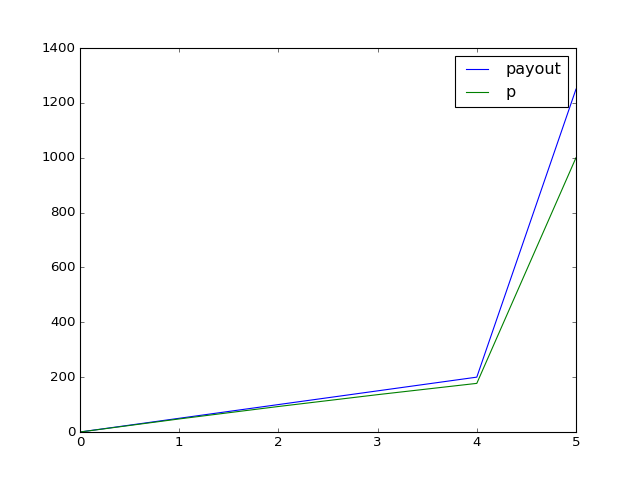

In [60]:
plt.clf()
bv[['payout','p']].cumsum().plot()


### Bonds: Valuation Conclusion
Based on the Time Value of Money, then, we should be willing to pay $\$1,000$ to receive five annual payments of $\$50$ and a final payment of $\$1,000$ after five years, assuming an interest rate of $5\%$. When the bond valuation is equal to the face value, we say the bond is **“selling at _par_ value.”**

### Exercise: Question the Assumptions

What if the interest rate assumption was wrong? How does a higher rate impact the attractiveness of investing in this bond? What about a lower rate?

Keeping everything else the same, change the interest rate, i, and re-analyze the valuation of the bond. At an interest rate of 7%, should you still buy it at a face value of $\$1000$? 

What about a 4% interest rate?

In [62]:
i = 0.04
bv['pvif'] = [pow(1+i, -y) for y in bv['year']]     
bv['p'] = bv['payout']*bv['pvif']
print(bv['p'].cumsum())

0       0.000000
1      48.076923
2      94.304734
3     138.754552
4     181.494761
5    1044.518223
Name: p, dtype: float64


When the bond valuation is below the face value we say the bond is “selling at discount to par value.”

When the bond valuation is below the face value we say the bond is “selling at premium to par value.”

### A note about Interest Rates

I keep using the term, “interest rate” and it appears to mean different things depending on the use. Unfortunately, there are many terms for the same concept. And there are many concepts that use the same name. 
- Back in our bond calculations, the market interest rate which was the denominator of our TVM analysis is also known as the “yield to maturity” (YTM) or simply “yield”.
- People will also use the term “discount rate” or “discount factor” because we are discounting our future cash flows back to the present at this rate

To make it even more confusing, there are many different interest rates in an economy
- The interest rate the government is charged to borrow money is lower than the interest rate I am charged on my credit card
- Companies with good investment opportunities and lots of cash have lower interest rates for their corporate debt than companies few growth opportunities and no cash.
- Interest rates for the exact same security will change over time
- Interest rates of identical securities with different times to maturity will be different
- But in all these cases, the interest rate will increase when a given risk increases and decrease when a given risk decreases.


The logic is simple:
- In the face of multiple investment or lending opportunities, if we are not compensated for additional risk we will always put our money in the least risky opportunity.
- We need to be induced to invest or lend to the riskier situation by the promise of higher returns.

### The Fed. 

The growth of money, being tied to so closely to the market and to the rate at which banks can get loans, is strongly affected by the Federal Reserve. [Try being the Fed](http://sffed-education.org/chairthefed/). Can you keep us on an even keel?

## Additional info on Bond pricing, rates paid by utilities to print, handle, etc.

Bonds aren't sold out of thin air. Importantly, the price of the bond should also reflect the sometimes small, sometimes appreciable, expenditures required to print and manage the bond sales. Contemplate the impact of selling many small bonds vs. a few large bonds. How might this choice impact those expenditures?


## Key Lessons

We have covered the following key concepts in this notebook:

- \$x today is more valuable than \$x tomorrow (time value of money)
- The future value with simple interest is $F_{simple} =  P(1+iN)$
- The future value with compounding interest is $F_{compound} = P(1+i)^N$
- The principal P required to acheive a certain F is $P_{compound} = \frac{F}{(1+i)^N}$
- Inflation is a direct result of the time value of money and can be derived from $F_{simple}$
- Inflation adjusted interest rate is $i^* = \frac{(1+i)}{(1+r)} - 1$ where r is inflation rate, i is nominal interest rate.
- $i_{MARR}$ is the lowest interest rate $i$ one is willing to get for investing their money, given known $F$ and $P$.
- Amortized payments (like monthly car payments) make this whole thing much more complex.
- Annuities are repeated payments, and compound annuities receive compounded interest.
- The future value of a compound annuity in today's dollars is $FVA = PMT\frac{(1+i)^n-1}{i}$
- Solving for the payment can give an idea of the real value: $PMT = FVA\frac{i}{(1+i)^n-1}$
- The present value of a compound annuity in today's dollars is $PVA = PMT\frac{1 - (1+i)^{-n}}{i}$
- Solving for the payment can give an idea of obligations: $PMT = PVA\frac{i}{1 - (1+i)^{-n}}$
- The book's notation for payments for the present value of an annuity is : $\frac{F}{N} = \left[ \frac{i(1+i)^n}{(1+i)^n - 1} \right]P$ 
- With rearrangement, that is the same as: $\frac{F}{N} = \left[ \frac{i}{1 - (1+i)^{-n}} \right]P$.


## Next Topic

Over the next week, we'll be talking about :

- The Levelized Cost of Electricity